In [1]:
import selenium
import pandas as pd 
from selenium import webdriver
import warnings
warnings.filterwarnings('ignore')
from selenium.common.exceptions import StaleElementReferenceException , NoSuchElementException
from selenium.webdriver.common.by import By
import time
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.action_chains import ActionChains

In [14]:
options = Options()
options.add_argument("--disable-notifications")
driver = webdriver.Chrome("C:/chrome_driver/chromedriver.exe", chrome_options=options)
# driver.get('https://www.cardekho.com/used-cars+in+pune') # opening web address in chrome driver browser
driver.get('https://www.cardekho.com/used-cars') # Try for 5000 cars

time.sleep(5)

close_button = driver.find_element(By.XPATH, '//*[@id="cityPopUp"]/div/div[1]/img')
close_button.click()

In [15]:
from selenium.webdriver.common.keys import Keys
for i in range(0,2000): # Dynamic Page # Continuing with limited results as because of processing time and speed.
    html = driver.find_element(By.TAG_NAME, 'html')
    html.send_keys(Keys.END)
    time.sleep(0.1)  # Increase loop upper limit and inline time values to load more results from website

time.sleep(180)

In [16]:
cars = []
use_details = []
price = []

In [17]:
# Getting Car Model Year, Car Type and Model
all_comments = driver.find_elements(By.XPATH, '//h3[@class="title truncate2L"]')
for i in all_comments:
    text = i.text
    cars.append(text)

In [18]:
# Getting Car use details
all_comments = driver.find_elements(By.XPATH, '//div[@class="dotsDetails"]')
for i in all_comments:
    text = i.text
    use_details.append(text)

In [19]:
# Getting Car use details
all_comments = driver.find_elements(By.XPATH, '//div[@class="Price"]')
for i in all_comments:
    text = i.text
    price.append(text)

In [20]:
data = pd.DataFrame()

In [21]:
print(len(cars))
print(len(use_details))
print(len(price))

1554
1554
1554


In [22]:
data['Cars'] = cars
data['use_details'] = use_details
data['price'] = price

In [23]:
data

,Cars,use_details,price
0,2017 Honda City i-VTEC CVT ZX,"57,826 kms • Petrol • Automatic",₹ 8.90 Lakh
1,2019 Honda City i-VTEC VX,"38,409 kms • Petrol • Manual",₹ 9.40 Lakh
2,2017 Honda City i-VTEC CVT ZX,"27,914 kms • Petrol • Automatic",₹ 9.45 Lakh
3,2021 Hyundai Venue SX Plus Turbo DCT,"8,639 kms • Petrol • Automatic",₹ 12.60 Lakh
4,2020 Renault Triber RXL,"43,737 kms • Petrol • Manual",₹ 5.90 Lakh
...,...,...,...
1549,2014 Audi A6 2.0 TDI Premium Plus,"1,00,000 kms • Diesel • Automatic",₹ 18.50 Lakh
1550,2015 Maruti Alto 800 VXI,"23,245 kms • Petrol • Manual",₹ 2.30 Lakh
1551,,kms • •,₹
1552,2012 Hyundai i20 Asta Optional with Sunroof 1.2,"8,543 kms • Petrol • Manual",₹ 5.00 Lakh


In [24]:
data.shape

(1554, 3)

In [43]:
reg_year = []
name_of_cars = []
for i in data['Cars']:
    try:
        year = int(i[:4])
        name_of_car = i[5:]
        reg_year.append(year)
        name_of_cars.append(name_of_car)
    except ValueError:
        name_of_car = i[5:]
        reg_year.append(2015)
        name_of_cars.append(name_of_car)

In [44]:
distance_travelled = []
fuel_used = []
gear_change = []

for i in data['use_details']:
    a = i.split('•')
    km = a[0]
    fuel = a[1]
    gear = a[2]
    distance_travelled.append(km.strip())
    gear_change.append(gear.strip())
    fuel_used.append(fuel.strip())

In [45]:
# Replacing names
import re
  
# initializing unit 
unit = "kms"

res = [sub.replace(unit, "").strip() for sub in distance_travelled]


distance_travelled = []
for i in res:
    try:
        a = i.replace(',', "")
        distance_travelled.append(int(a))
    except ValueError:
        distance_travelled.append(25000)       

In [53]:
data['Cars'][0].split(' ', 2)[1]

'Honda'

In [55]:
Manufacturer = []
for i in data['Cars']:
    try:
        name_of_car = i.split(' ', 2)
        Manufacturer.append(name_of_car[1])
        # print(name_of_car[1])
    except IndexError:
        Manufacturer.append('Maruti')

In [141]:
final_prices = []
for i in price:
    if len(i) != 1:
        if 'Lakh' not in i:
            a = '₹ 95000'
            b = a.replace('₹ ', '')
            final_prices.append(float(b))
        else:
            a = i
            b = a.replace('₹', '')
            c = b.replace(' Lakh', '')
            d = float(c) * 100000
            final_prices.append(round(d))
    else:
        final_prices.append(500000)

[890000,
 940000,
 945000,
 1260000,
 590000,
 1185000,
 969000,
 500000,
 639000,
 999000,
 899000,
 925000,
 649000,
 699000,
 799000,
 500000,
 4000000,
 535000,
 4650000,
 649000,
 6150000,
 330000,
 669000,
 500000,
 578000,
 907000,
 1125000,
 1226000,
 750000,
 549000,
 249000,
 500000,
 375000,
 699000,
 328000,
 368000,
 360000,
 926000,
 425000,
 500000,
 600000,
 440000,
 490000,
 185000,
 6575000,
 210000,
 495000,
 500000,
 600000,
 1955000,
 2550000,
 1950000,
 1575000,
 2674000,
 425000,
 500000,
 3950000,
 1975000,
 1349000,
 750000,
 860000,
 1350000,
 3576000,
 500000,
 460000,
 625000,
 1300000,
 275000,
 790000,
 225000,
 310000,
 500000,
 1450000,
 2875000,
 175000,
 1400000,
 2950000,
 1945000,
 600000,
 500000,
 1500000,
 4374000,
 149000,
 150000,
 750000,
 2176000,
 1273000,
 500000,
 425000,
 310000,
 2473000,
 150000,
 1350000,
 1200000,
 2050000,
 500000,
 150000,
 325000,
 410000,
 2573000,
 200000,
 95000.0,
 300000,
 500000,
 2474000,
 95000.0,
 100000,
 

In [142]:
price

['₹ 8.90 Lakh',
 '₹ 9.40 Lakh',
 '₹ 9.45 Lakh',
 '₹ 12.60 Lakh',
 '₹ 5.90 Lakh',
 '₹ 11.85 Lakh',
 '₹ 9.69 Lakh',
 '₹',
 '₹ 6.39 Lakh',
 '₹ 9.99 Lakh',
 '₹ 8.99 Lakh',
 '₹ 9.25 Lakh',
 '₹ 6.49 Lakh',
 '₹ 6.99 Lakh',
 '₹ 7.99 Lakh',
 '₹',
 '₹ 40.00 Lakh',
 '₹ 5.35 Lakh',
 '₹ 46.50 Lakh',
 '₹ 6.49 Lakh',
 '₹ 61.50 Lakh',
 '₹ 3.30 Lakh',
 '₹ 6.69 Lakh',
 '₹',
 '₹ 5.78 Lakh',
 '₹ 9.07 Lakh',
 '₹ 11.25 Lakh',
 '₹ 12.26 Lakh',
 '₹ 7.50 Lakh',
 '₹ 5.49 Lakh',
 '₹ 2.49 Lakh',
 '₹',
 '₹ 3.75 Lakh',
 '₹ 6.99 Lakh',
 '₹ 3.28 Lakh',
 '₹ 3.68 Lakh',
 '₹ 3.60 Lakh',
 '₹ 9.26 Lakh',
 '₹ 4.25 Lakh',
 '₹',
 '₹ 6.00 Lakh',
 '₹ 4.40 Lakh',
 '₹ 4.90 Lakh',
 '₹ 1.85 Lakh',
 '₹ 65.75 Lakh',
 '₹ 2.10 Lakh',
 '₹ 4.95 Lakh',
 '₹',
 '₹ 6.00 Lakh',
 '₹ 19.55 Lakh',
 '₹ 25.50 Lakh',
 '₹ 19.50 Lakh',
 '₹ 15.75 Lakh',
 '₹ 26.74 Lakh',
 '₹ 4.25 Lakh',
 '₹',
 '₹ 39.50 Lakh',
 '₹ 19.75 Lakh',
 '₹ 13.49 Lakh',
 '₹ 7.50 Lakh',
 '₹ 8.60 Lakh',
 '₹ 13.50 Lakh',
 '₹ 35.76 Lakh',
 '₹',
 '₹ 4.60 Lakh',
 '₹ 6.25 Lakh',
 '₹ 13

In [57]:
data_set = pd.DataFrame()

In [58]:
data_set["Registeration_year"] = reg_year
data_set['Name'] = name_of_cars
data_set['Manufacturer'] = Manufacturer
data_set['distance_travelled'] = distance_travelled
data_set['fuel_used'] = fuel_used
data_set['gear_change'] = gear_change
data_set

,Registeration_year,Name,Manufacturer,distance_travelled,fuel_used,gear_change
0,2017,Honda City i-VTEC CVT ZX,Honda,57826,Petrol,Automatic
1,2019,Honda City i-VTEC VX,Honda,38409,Petrol,Manual
2,2017,Honda City i-VTEC CVT ZX,Honda,27914,Petrol,Automatic
3,2021,Hyundai Venue SX Plus Turbo DCT,Hyundai,8639,Petrol,Automatic
4,2020,Renault Triber RXL,Renault,43737,Petrol,Manual
...,...,...,...,...,...,...
1549,2014,Audi A6 2.0 TDI Premium Plus,Audi,100000,Diesel,Automatic
1550,2015,Maruti Alto 800 VXI,Maruti,23245,Petrol,Manual
1551,2015,,Maruti,25000,,
1552,2012,Hyundai i20 Asta Optional with Sunroof 1.2,Hyundai,8543,Petrol,Manual


In [60]:
data_set['final_prices'] = final_prices

In [61]:
import datetime
today = datetime.date.today()
year = today.year

years_old = []
for i in reg_year:
    b = year - i
    years_old.append(b)

In [62]:
data_set['years_old'] = years_old

In [63]:
data_set

,Registeration_year,Name,Manufacturer,distance_travelled,fuel_used,gear_change,final_prices,years_old
0,2017,Honda City i-VTEC CVT ZX,Honda,57826,Petrol,Automatic,890000.0,6
1,2019,Honda City i-VTEC VX,Honda,38409,Petrol,Manual,890000.0,4
2,2017,Honda City i-VTEC CVT ZX,Honda,27914,Petrol,Automatic,890000.0,6
3,2021,Hyundai Venue SX Plus Turbo DCT,Hyundai,8639,Petrol,Automatic,890000.0,2
4,2020,Renault Triber RXL,Renault,43737,Petrol,Manual,890000.0,3
...,...,...,...,...,...,...,...,...
1549,2014,Audi A6 2.0 TDI Premium Plus,Audi,100000,Diesel,Automatic,890000.0,9
1550,2015,Maruti Alto 800 VXI,Maruti,23245,Petrol,Manual,890000.0,8
1551,2015,,Maruti,25000,,,95000.0,8
1552,2012,Hyundai i20 Asta Optional with Sunroof 1.2,Hyundai,8543,Petrol,Manual,890000.0,11


# -----------------------------------------------------------------------------------------------------------

In [64]:
# To Read and Process Data
import pandas as pd
import numpy as np


# For data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Getting over warning messages
import warnings
warnings.filterwarnings('ignore')

# For Encoding Categorical Data
from sklearn.preprocessing import LabelEncoder

# for scaling
from sklearn.preprocessing import StandardScaler

# To display all columns
pd.pandas.set_option('display.max_columns',None)

In [65]:
# For handling outliers
# importing required libraries
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore

In [66]:
# For machine learning and finding 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [67]:
df = data_set.copy()

In [68]:
df.shape

(1554, 8)

In [69]:
# getting to know size of data set, to know overall records, and columns
print(f'Number of rows and columns in given Data Frame is {df.shape}')

Number of rows and columns in given Data Frame is (1554, 8)


In [70]:
df.head()

,Registeration_year,Name,Manufacturer,distance_travelled,fuel_used,gear_change,final_prices,years_old
0,2017,Honda City i-VTEC CVT ZX,Honda,57826,Petrol,Automatic,890000.0,6
1,2019,Honda City i-VTEC VX,Honda,38409,Petrol,Manual,890000.0,4
2,2017,Honda City i-VTEC CVT ZX,Honda,27914,Petrol,Automatic,890000.0,6
3,2021,Hyundai Venue SX Plus Turbo DCT,Hyundai,8639,Petrol,Automatic,890000.0,2
4,2020,Renault Triber RXL,Renault,43737,Petrol,Manual,890000.0,3


In [71]:
df.tail()

,Registeration_year,Name,Manufacturer,distance_travelled,fuel_used,gear_change,final_prices,years_old
1549,2014,Audi A6 2.0 TDI Premium Plus,Audi,100000,Diesel,Automatic,890000.0,9
1550,2015,Maruti Alto 800 VXI,Maruti,23245,Petrol,Manual,890000.0,8
1551,2015,,Maruti,25000,,,95000.0,8
1552,2012,Hyundai i20 Asta Optional with Sunroof 1.2,Hyundai,8543,Petrol,Manual,890000.0,11
1553,2017,Toyota Fortuner 2.8 2WD MT BSIV,Toyota,48000,Diesel,Manual,890000.0,6


In [72]:
df.sample(10)

,Registeration_year,Name,Manufacturer,distance_travelled,fuel_used,gear_change,final_prices,years_old
64,2015,Hyundai Grand i10 Asta Option,Hyundai,60000,Petrol,Manual,890000.0,8
948,2014,Maruti Swift Dzire VDI,Maruti,120000,Diesel,Manual,890000.0,9
1188,2012,Toyota Etios G,Toyota,100000,Petrol,Manual,890000.0,11
557,2010,Mahindra Scorpio M2DI,Mahindra,189000,Diesel,Manual,890000.0,13
1146,2020,MG Hector Sharp DCT,MG,14000,Petrol,Automatic,890000.0,3
305,2022,Maruti Swift Dzire ZXI CNG,Maruti,1000,CNG,Manual,890000.0,1
1291,2021,Kia Seltos HTX IVT G,Kia,13000,Petrol,Automatic,890000.0,2
169,2016,Maruti Wagon R LXI CNG,Maruti,129073,CNG,Manual,890000.0,7
407,2015,,Maruti,25000,,,95000.0,8
1116,2009,Chevrolet Aveo U-VA 1.2 LS,Chevrolet,53000,Petrol,Manual,890000.0,14


In [73]:
df.columns

Index(['Registeration_year', 'Name', 'Manufacturer', 'distance_travelled',
       'fuel_used', 'gear_change', 'final_prices', 'years_old'],
      dtype='object')

In [74]:
# Removing duplicate values
df.duplicated().sum()

218

In [75]:
df.drop_duplicates()

,Registeration_year,Name,Manufacturer,distance_travelled,fuel_used,gear_change,final_prices,years_old
0,2017,Honda City i-VTEC CVT ZX,Honda,57826,Petrol,Automatic,890000.0,6
1,2019,Honda City i-VTEC VX,Honda,38409,Petrol,Manual,890000.0,4
2,2017,Honda City i-VTEC CVT ZX,Honda,27914,Petrol,Automatic,890000.0,6
3,2021,Hyundai Venue SX Plus Turbo DCT,Hyundai,8639,Petrol,Automatic,890000.0,2
4,2020,Renault Triber RXL,Renault,43737,Petrol,Manual,890000.0,3
...,...,...,...,...,...,...,...,...
1548,2021,Tata Nexon XZ Plus,Tata,26000,Petrol,Manual,890000.0,2
1549,2014,Audi A6 2.0 TDI Premium Plus,Audi,100000,Diesel,Automatic,890000.0,9
1550,2015,Maruti Alto 800 VXI,Maruti,23245,Petrol,Manual,890000.0,8
1552,2012,Hyundai i20 Asta Optional with Sunroof 1.2,Hyundai,8543,Petrol,Manual,890000.0,11


In [76]:
df.dtypes

Registeration_year      int64
Name                   object
Manufacturer           object
distance_travelled      int64
fuel_used              object
gear_change            object
final_prices          float64
years_old               int64
dtype: object

In [77]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Registeration_year,1554.0,2015.626126,3.637270,2000.0,2014.0,2015.0,2018.0,2022.0
distance_travelled,1554.0,54073.664736,37147.983813,450.0,25000.0,48150.0,74000.0,357000.0
final_prices,1554.0,774382.239382,280355.545294,95000.0,890000.0,890000.0,890000.0,890000.0
years_old,1554.0,7.373874,3.637270,1.0,5.0,8.0,9.0,23.0


In [78]:
df.describe(include="O")

,Name,Manufacturer,fuel_used,gear_change
count,1554,1554,1554,1554
unique,896,31,6,3
top,,Maruti,Petrol,Manual
freq,194,483,689,823


In [79]:
# Feature Wise missing Values
df.isnull().sum()

Registeration_year    0
Name                  0
Manufacturer          0
distance_travelled    0
fuel_used             0
gear_change           0
final_prices          0
years_old             0
dtype: int64

In [80]:
# All missing Values
print("There are total", df.isnull().sum().sum(), "missing values in dataset")

There are total 0 missing values in dataset


In [81]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == "O"]
numerical_features = [feature for feature in df.columns if df[feature].dtype != "O"]

In [82]:
categorical_features

['Name', 'Manufacturer', 'fuel_used', 'gear_change']

In [83]:
numerical_features

['Registeration_year', 'distance_travelled', 'final_prices', 'years_old']

In [84]:
print(f'Total Categorical Features are {len(categorical_features)}')
print(f'Total Numerical Features are {len(numerical_features)}')

Total Categorical Features are 4
Total Numerical Features are 4


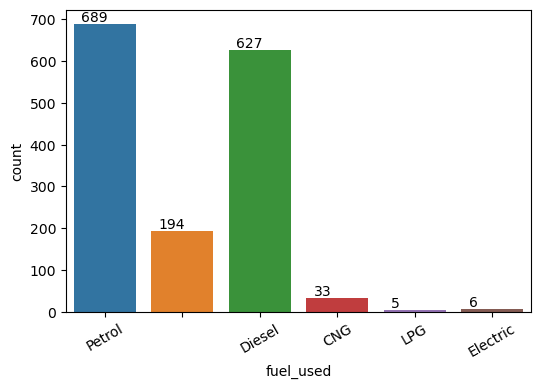

In [85]:
plt.figure(dpi=100)
plot = sns.countplot('fuel_used',data=df)
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
# print(df.fuel_used.value_counts())
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

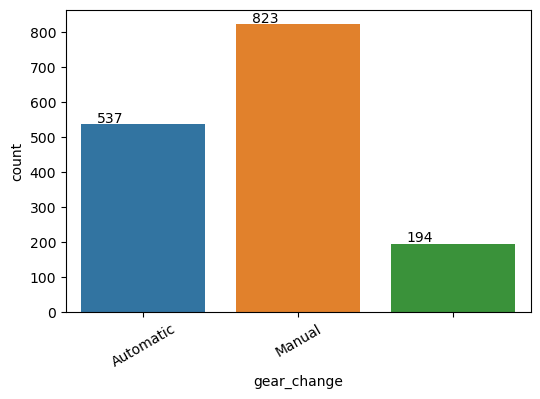

In [86]:
plt.figure(dpi=100)
plot = sns.countplot('gear_change',data=df)
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
# print(df.gear_change.value_counts())
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

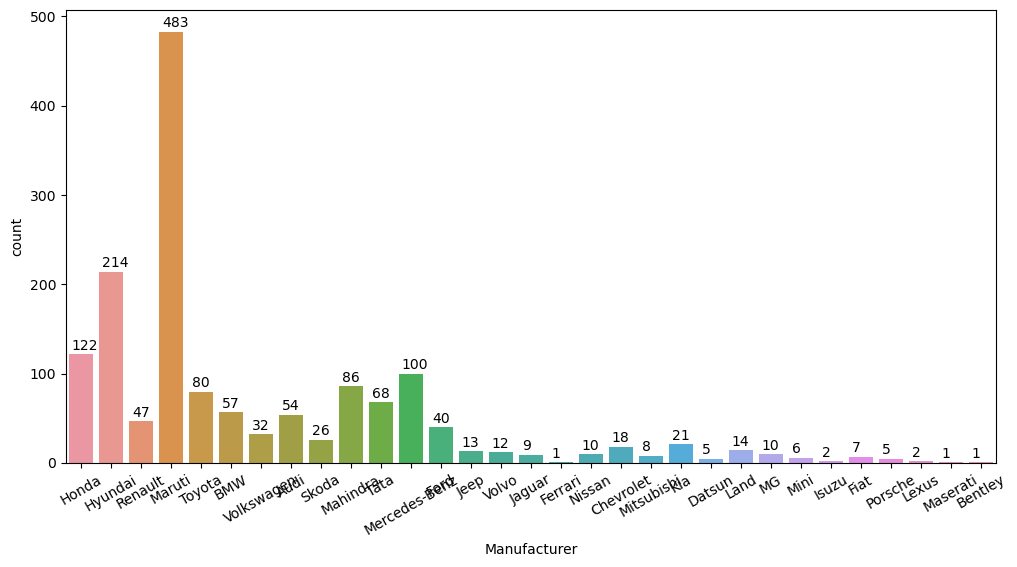

In [87]:
plt.figure(dpi=100, figsize=(12, 6))
plot = sns.countplot('Manufacturer',data=df)
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
# print(df.Manufacturer.value_counts())
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

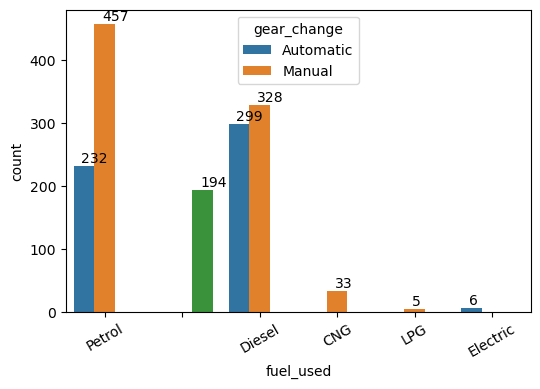

In [88]:
plt.figure(dpi=100)
plot = sns.countplot('fuel_used',data=df, hue='gear_change')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
# print(df.fuel_used.value_counts())
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

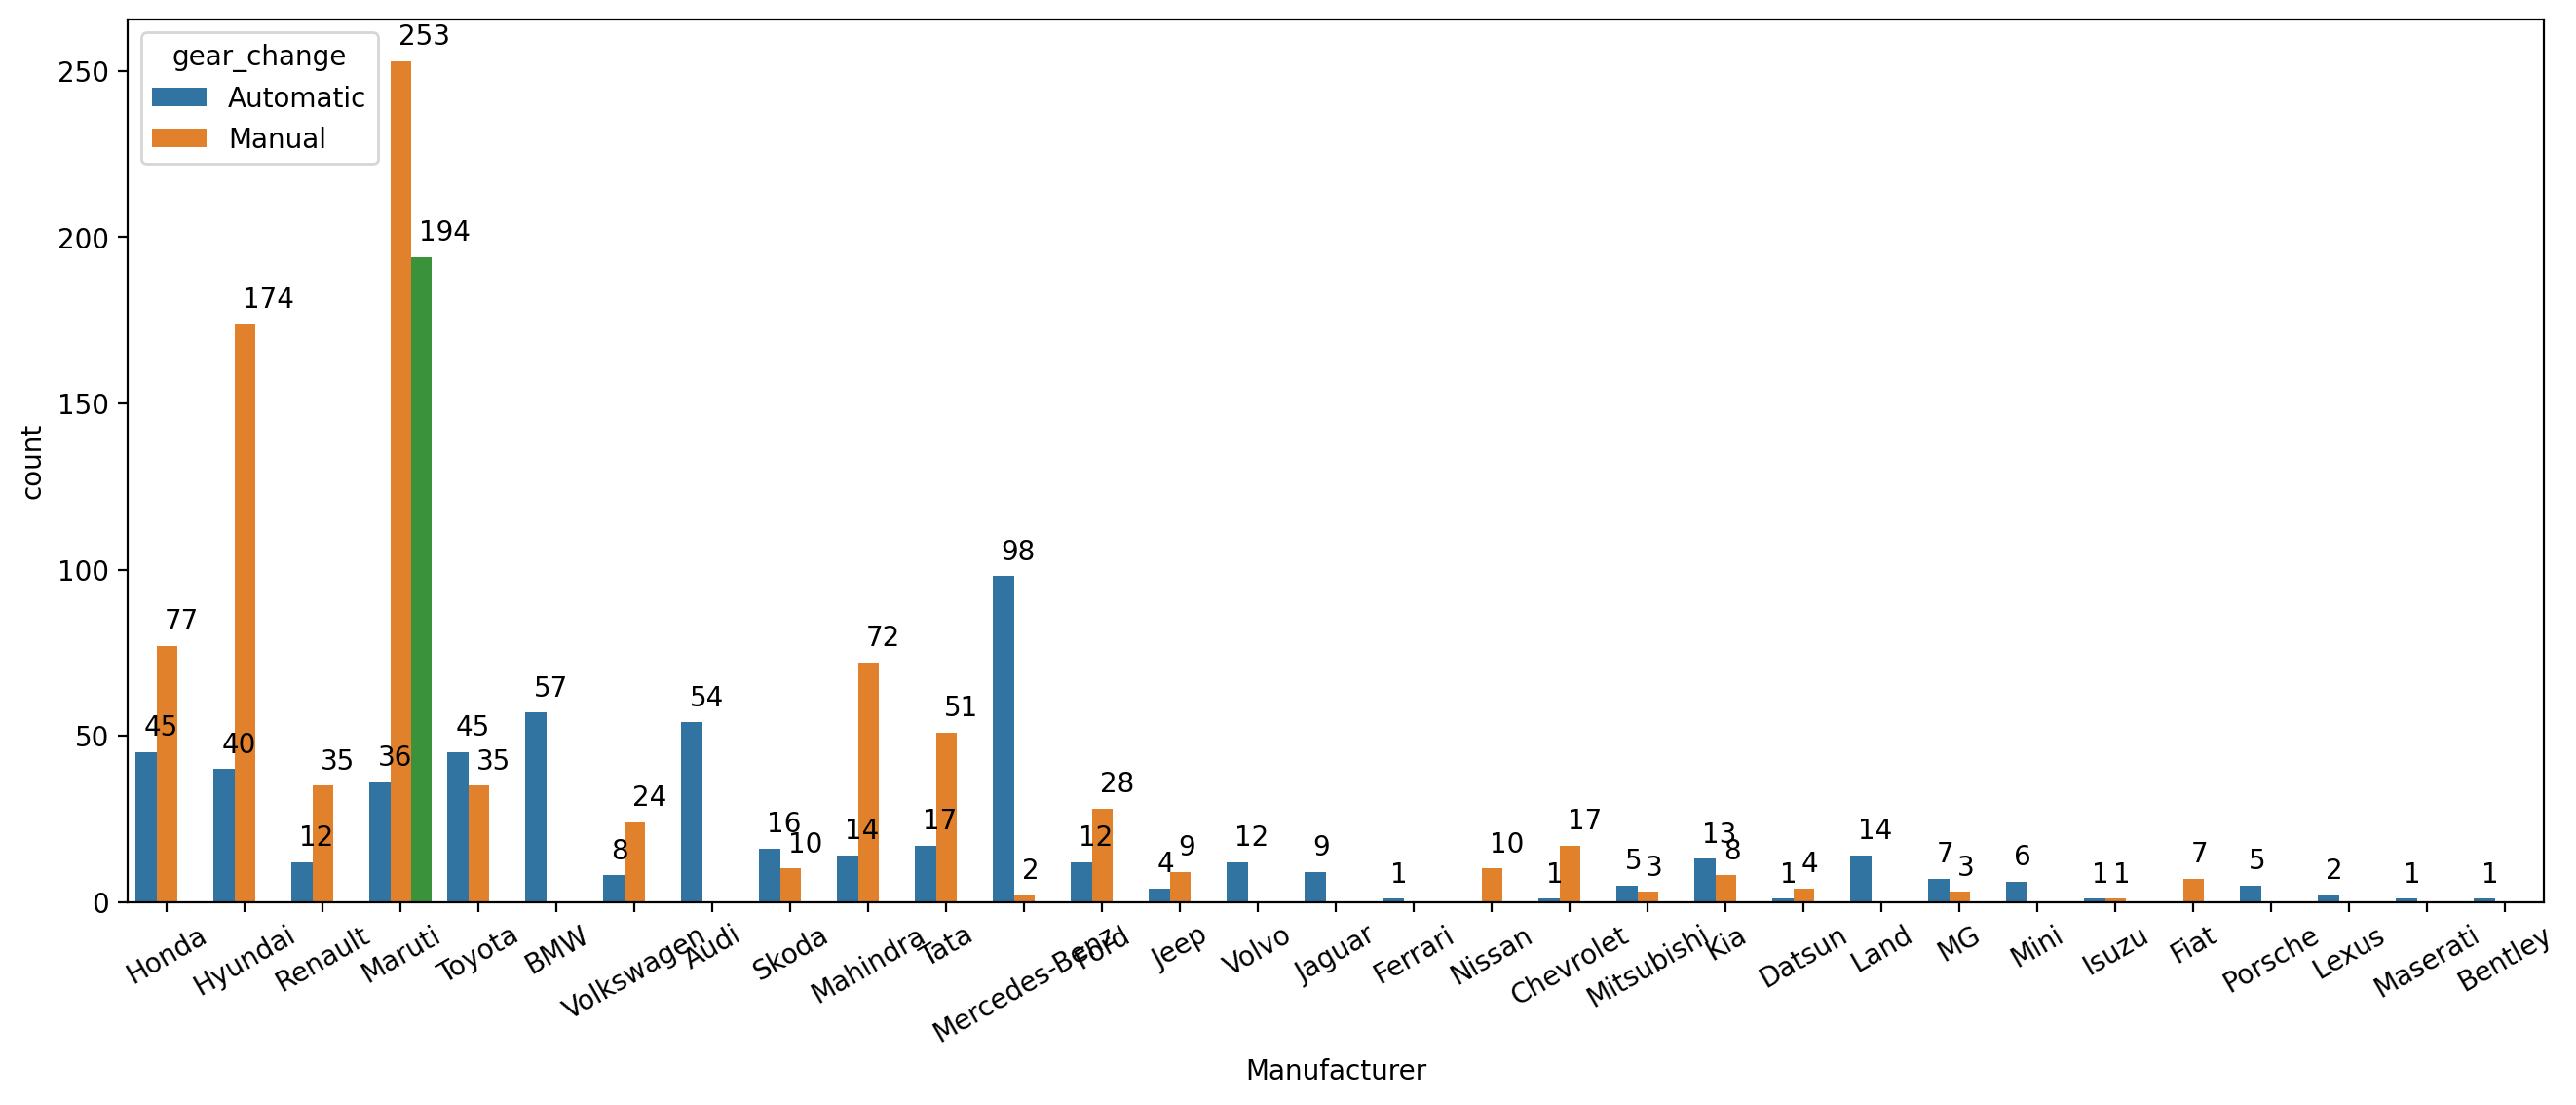

In [89]:
plt.figure(dpi=200, figsize=(16, 6))
plot = sns.countplot('Manufacturer',data=df, hue='gear_change')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
# print(df.Manufacturer.value_counts())
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

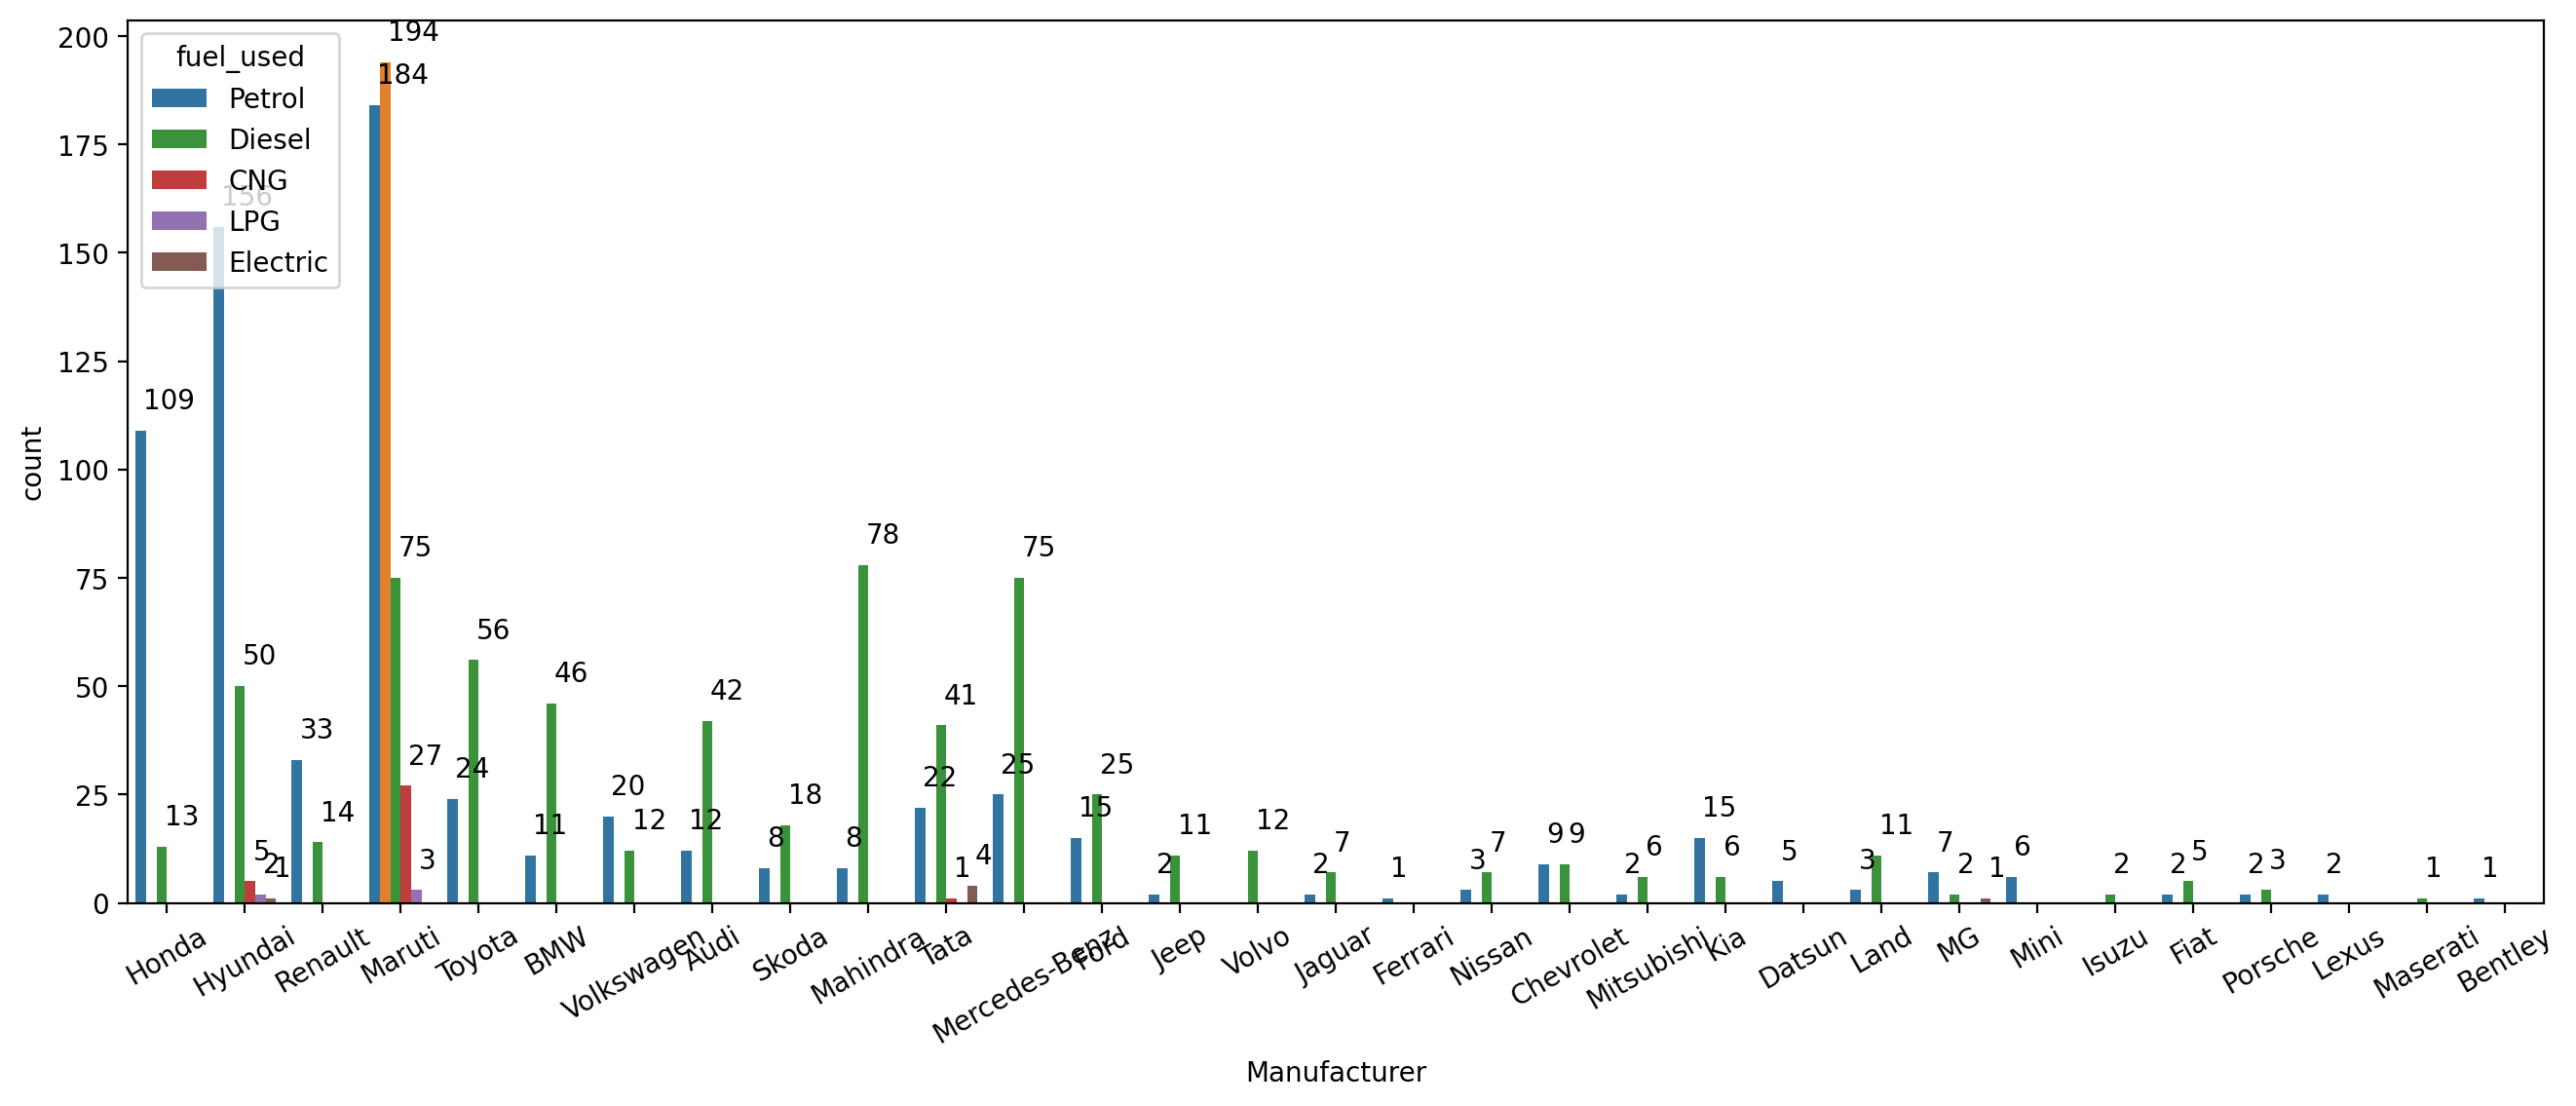

In [90]:
plt.figure(dpi=200, figsize=(16, 6))
plot = sns.countplot('Manufacturer',data=df, hue='fuel_used')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
# print(df.Manufacturer.value_counts())
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

In [91]:
for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")
    print("==========================================================")

Registeration_year: Number of unique values 21
Name: Number of unique values 896
Manufacturer: Number of unique values 31
distance_travelled: Number of unique values 576
fuel_used: Number of unique values 6
gear_change: Number of unique values 3
final_prices: Number of unique values 2
years_old: Number of unique values 21


Registeration_year       AxesSubplot(0.125,0.787927;0.168478x0.0920732)
distance_travelled    AxesSubplot(0.327174,0.787927;0.168478x0.0920732)
final_prices          AxesSubplot(0.529348,0.787927;0.168478x0.0920732)
years_old             AxesSubplot(0.731522,0.787927;0.168478x0.0920732)
dtype: object

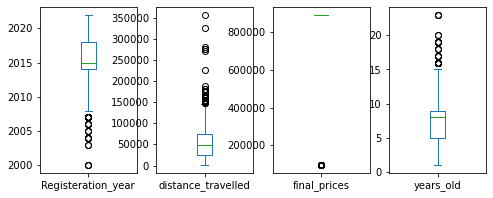

In [92]:
df.plot(kind='box',subplots=True,figsize=(8,25),layout=(7,4))
# plotting individual graph for better understanding of graph

### Observation - There are outliers but data is posted by people. We have to assume that that is correct and No false values are Posted.

<AxesSubplot:>

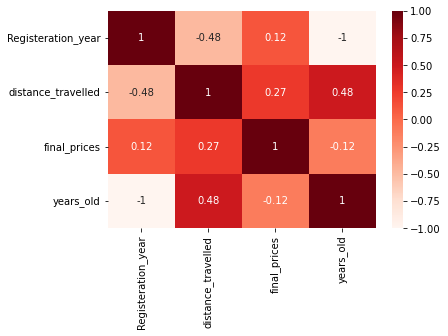

In [93]:
sns.heatmap(df.corr(),cmap='Reds',annot=True)

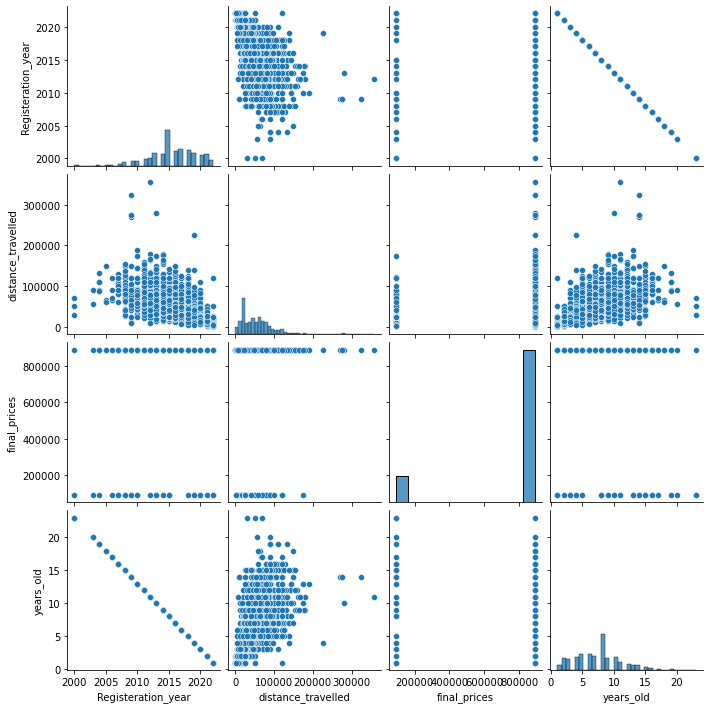

In [94]:
sns.pairplot(df)

<AxesSubplot:xlabel='distance_travelled', ylabel='Density'>

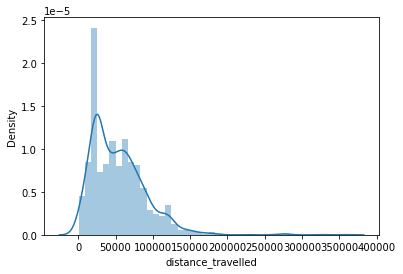

In [95]:
sns.distplot(df['distance_travelled'])

In [97]:
le = LabelEncoder()

In [96]:
old_df = df.copy()

In [98]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [99]:
def calc_vif(x1):
    vif=pd.DataFrame()
    vif["variables"]=x1.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(x1.values,i) for i in range(x1.shape[1])]
    return(vif)

In [100]:
df['Manufacturer']=le.fit_transform(old_df['Manufacturer'])
df['fuel_used']=le.fit_transform(old_df['fuel_used'])
df['gear_change']=le.fit_transform(old_df['gear_change'])

In [101]:
df.head()

,Registeration_year,Name,Manufacturer,distance_travelled,fuel_used,gear_change,final_prices,years_old
0,2017,Honda City i-VTEC CVT ZX,8,57826,5,1,890000.0,6
1,2019,Honda City i-VTEC VX,8,38409,5,2,890000.0,4
2,2017,Honda City i-VTEC CVT ZX,8,27914,5,1,890000.0,6
3,2021,Hyundai Venue SX Plus Turbo DCT,9,8639,5,1,890000.0,2
4,2020,Renault Triber RXL,25,43737,5,2,890000.0,3


In [102]:
y = df['final_prices']

In [103]:
x = df.drop(labels=['Registeration_year', 'Name'], axis=1)

In [104]:
x.drop('final_prices', axis=1, inplace=True)

In [105]:
y

0       890000.0
1       890000.0
2       890000.0
3       890000.0
4       890000.0
          ...   
1549    890000.0
1550    890000.0
1551     95000.0
1552    890000.0
1553    890000.0
Name: final_prices, Length: 1554, dtype: float64

In [106]:
x

,Manufacturer,distance_travelled,fuel_used,gear_change,years_old
0,8,57826,5,1,6
1,8,38409,5,2,4
2,8,27914,5,1,6
3,9,8639,5,1,2
4,25,43737,5,2,3
...,...,...,...,...,...
1549,0,100000,2,1,9
1550,18,23245,5,2,8
1551,18,25000,0,0,8
1552,9,8543,5,2,11


In [107]:
calc_vif(x)

,variables,VIF FACTOR
0,Manufacturer,3.242286
1,distance_travelled,5.072169
2,fuel_used,5.245172
3,gear_change,8.594922
4,years_old,5.280184


In [108]:
# all values are below 10, we can proceed for model Building.
# As our output variable is Numerical, so it is regression problem.

In [109]:
x.skew()

Manufacturer         -0.191315
distance_travelled    1.774999
fuel_used            -0.176834
gear_change          -0.749444
years_old             0.554184
dtype: float64

In [112]:
#model developemnt libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier# Load data


In [113]:
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
lg=LogisticRegression()
knc=KNeighborsClassifier()
sgc=SGDClassifier()

In [115]:
seed=7
#prepare models
models=[]
models.append(('DecisionTreeClassifier',dtc))
models.append(('RandomForestClassifier',rfc))
models.append(('KNeighborsClassifier',knc))
models.append(('SGDClassifier',sgc))
models.append(('LogisticRegression',lg))

 ------------------------ Results with Random State 0 ------------------------
                        Model        cvs      score   rocscore
0      DecisionTreeClassifier  95.955657  96.788009  92.695578
1      RandomForestClassifier  97.426096  97.858672  93.333333
2        KNeighborsClassifier  97.334353  97.858672  93.333333
3               SGDClassifier  97.884811  97.858672  93.333333
4          LogisticRegression  97.885661  97.858672  93.333333
5                   LinearSVC  97.885661  97.858672  93.333333
6  GradientBoostingClassifier  97.609582  97.644540  93.205782
7                  GaussianNB  97.977404  97.858672  93.333333
 ------------------------ Results with Random State 3 ------------------------
                        Model        cvs      score   rocscore
0      DecisionTreeClassifier  96.502718  95.717345  89.129353
1      RandomForestClassifier  97.885661  96.573876  88.337160
2        KNeighborsClassifier  98.437819  96.788009  88.461538
3               SGDClas

 ------------------------ Results with Random State 39 ------------------------
                        Model        cvs      score   rocscore
0      DecisionTreeClassifier  96.681108  96.573876  91.622208
1      RandomForestClassifier  97.789670  97.002141  91.296771
2        KNeighborsClassifier  97.974006  97.430407  91.549296
3               SGDClassifier  97.791369  97.430407  92.127259
4          LogisticRegression  97.974006  97.002141  91.874733
5                   LinearSVC  97.974006  96.788009  91.170508
6  GradientBoostingClassifier  97.882263  97.002141  91.296771
7                  GaussianNB  97.790520  96.573876  91.044245
 ------------------------ Results with Random State 42 ------------------------
                        Model        cvs      score   rocscore
0      DecisionTreeClassifier  96.230037  95.717345  92.057823
1      RandomForestClassifier  97.976555  97.216274  91.872449
2        KNeighborsClassifier  98.069147  97.002141  91.205782
3               SGDCl

 ------------------------ Results with Random State 78 ------------------------
                        Model        cvs      score   rocscore
0      DecisionTreeClassifier  96.134047  96.573876  92.653789
1      RandomForestClassifier  97.974856  97.430407  93.165298
2        KNeighborsClassifier  97.881414  97.858672  94.481088
3               SGDClassifier  97.789670  97.858672  93.421053
4          LogisticRegression  97.881414  97.858672  93.951070
5                   LinearSVC  97.881414  97.858672  93.421053
6  GradientBoostingClassifier  97.605335  97.430407  93.165298
7                  GaussianNB  97.973157  97.858672  93.421053
 ------------------------ Results with Random State 81 ------------------------
                        Model        cvs      score   rocscore
0      DecisionTreeClassifier  95.581040  96.573876  95.139581
1      RandomForestClassifier  97.144920  98.929336  96.487620
2        KNeighborsClassifier  97.421848  98.715203  95.640163
3               SGDCl

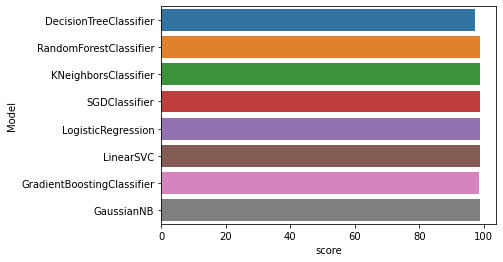

In [116]:
for i in [i for i in range(0, 101, 3)]:
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    
    
    sc=StandardScaler()
    x_train=sc.fit_transform(x_train)
    x_test=sc.fit_transform(x_test)
    
    
    dtc=DecisionTreeClassifier()
    rfc=RandomForestClassifier()
    lg=LogisticRegression()
    knc=KNeighborsClassifier()
    sgc=SGDClassifier()
    svc = LinearSVC()
    gbc = GradientBoostingClassifier()
    gnb = GaussianNB()
    
    
    seed=7
    #prepare models
    models=[]
    models.append(('DecisionTreeClassifier',dtc))
    models.append(('RandomForestClassifier',rfc))
    models.append(('KNeighborsClassifier',knc))
    models.append(('SGDClassifier',sgc))
    models.append(('LogisticRegression',lg))
    models.append(('LinearSVC', svc))
    models.append(('GradientBoostingClassifier', gbc))
    models.append(('GaussianNB', gnb))
    
    Model=[]
    cvs=[]
    score=[]
    rocscore=[]
    for name,model in models:
        Model.append(name)
        model.fit(x_train,y_train)
        pred=model.predict(x_test)
        acc=accuracy_score(y_test,pred)
        score.append(acc*100)
        kfold=model_selection.KFold(n_splits=10)
        cv=model_selection.cross_val_score(model,x_train,y_train,cv=10,scoring='accuracy').mean()
        # print('Cross-val-score=',cv)
        cvs.append(cv*100)
        false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pred, pos_label=2)
        roc_auc=roc_auc_score(y_test,pred)
        rocscore.append(roc_auc*100)
        cm=confusion_matrix(y_test,pred)
        
    result=pd.DataFrame({'Model':Model, 'cvs' :cvs, 'score' :score, 'rocscore' :rocscore}, columns=['Model', 'cvs','score','rocscore'])
    print(f'\033[1m ------------------------ Results with Random State {i} ------------------------')
    print(result)
    sns.barplot(y='Model',x='score',data=result)
    result['score']

In [117]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [118]:
random_state = []
training_accuracy = []
testing_accuracy = []

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=69)
    lr = DecisionTreeClassifier()
    lr.fit(x_train, y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    random_state.append(i)
    training_accuracy.append(round(r2_score(y_train,pred_train), 2))
    testing_accuracy.append(round(r2_score(y_test,pred_test), 2))
    
lr_acc = pd.DataFrame()


lr_acc['random_state'] = random_state
lr_acc['training_accuracy'] = training_accuracy
lr_acc['testing_accuracy'] = testing_accuracy

lr_acc.sort_values('testing_accuracy')

,random_state,training_accuracy,testing_accuracy
49,50,0.99,0.65
173,174,0.99,0.65
32,33,0.99,0.65
47,48,0.99,0.65
171,172,0.99,0.65
...,...,...,...
37,38,0.99,0.74
55,56,0.99,0.74
75,76,0.99,0.76
195,196,0.99,0.76


In [119]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [120]:
random_state = []
training_accuracy = []
testing_accuracy = []

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.3,random_state=i)
    lr = RandomForestRegressor()
    lr.fit(x_train, y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    random_state.append(i)
    training_accuracy.append(round(r2_score(y_train,pred_train), 2))
    testing_accuracy.append(round(r2_score(y_test,pred_test), 2))


In [121]:
lr_acc = pd.DataFrame()

In [122]:
lr_acc['random_state'] = random_state
lr_acc['training_accuracy'] = training_accuracy
lr_acc['testing_accuracy'] = testing_accuracy

In [123]:
lr_acc.sort_values('testing_accuracy').tail(1)

,random_state,training_accuracy,testing_accuracy
100,101,0.97,0.91


In [124]:
new_df = old_df.sample(frac=1, random_state=0)


new_df['Manufacturer']=le.fit_transform(new_df['Manufacturer'])
new_df['fuel_used']=le.fit_transform(new_df['fuel_used'])
new_df['gear_change']=le.fit_transform(new_df['gear_change'])

y = new_df['final_prices']
x = new_df.drop(labels=['Registeration_year', 'Name'], axis=1)
x.drop('final_prices', axis=1, inplace=True)

In [125]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.3,random_state=100)

In [126]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [127]:
parameters = {'criterion':['mse','mae'], 'max_features':["auto","sqrt","log2"]}

rf=RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'sqrt'}


In [128]:
rf=RandomForestRegressor(criterion="mse",max_features="log2")
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision = rf.predict(x_test)

rfs = r2_score(y_test,pred_decision)
print('R2 Score:',rfs*100)

rfscore = cross_val_score(rf,x,y,cv=5)
rfc = rfscore.mean()
print('Cross Validation Score:',rfc*100)

R2 Score: 88.82384603171988
Cross Validation Score: 82.91826285868686


### Observation - Random Forest Regressor is chooses, with Highest accuracy.

In [132]:
old_df.to_csv('Cars.csv')

In [143]:
a = pd.DataFrame()
a['a'] = final_prices

In [145]:
a.to_csv('Up_price')